# PROJETO PREVISÃO DE PREÇOS DE CASAS EM BOSTOM

Objetivo: Desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston.


---



Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd



---



# Análise Preliminar


- RM: Número médio de cômodos entre os imóveis no bairro.

- LSTAT: Porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

- PTRATIO: Razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

- MEDV: Valor médio das casas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv('/content/drive/MyDrive/trabalhos/python/preco_de_casas/dados/housing.csv', sep=',', encoding='utf-8')

In [6]:
dados.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
dados.shape

(489, 4)

In [8]:
dados.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


## Dados Duplicados

In [9]:
dados.duplicated().sum()

0

## Dados em NAN

In [10]:
dados.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


## RM

In [11]:
# Menor quantidade média de cômodos (3.561), e maior quantidade média de cômodos (8.398)
dados['RM'].value_counts().sort_index()

,count
RM,
3.561,1
3.863,1
4.138,2
4.368,1
4.519,1
...,...
8.247,1
8.259,1
8.266,1


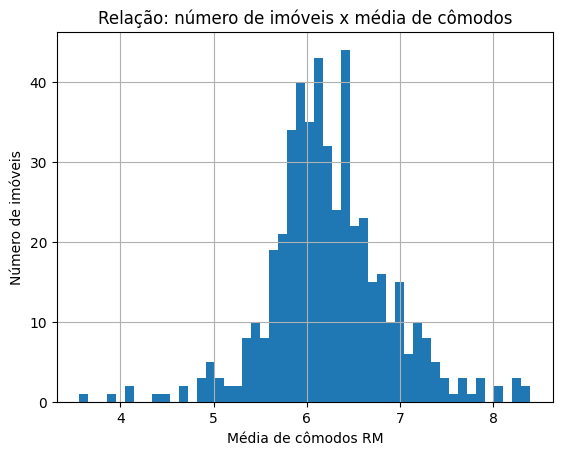

In [12]:
dados.RM.hist(bins=50)
plt.title('Relação: número de imóveis x média de cômodos')
plt.xlabel('Média de cômodos RM')
plt.ylabel('Número de imóveis')
plt.show()

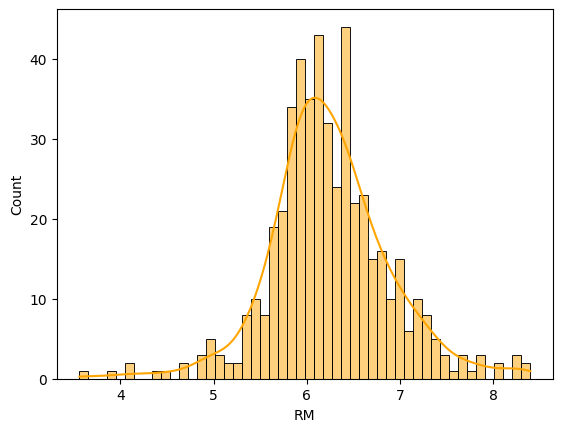

In [13]:
sns.histplot(dados, x='RM', bins=50, color="orange", kde=True, stat="count");

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


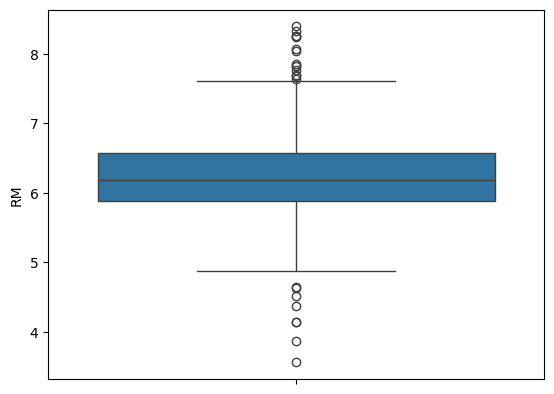

In [14]:
# Outliers
sns.boxplot(y='RM', data=dados);

## LSTAT

In [15]:
# Menor porcentagem de classe baixa (1.98%), e maior porcentagem de classe baixa (37.97%)
dados['LSTAT'].value_counts().sort_index()

,count
LSTAT,
1.98,1
2.47,1
2.87,1
2.94,1
2.98,1
...,...
34.37,1
34.41,1
34.77,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


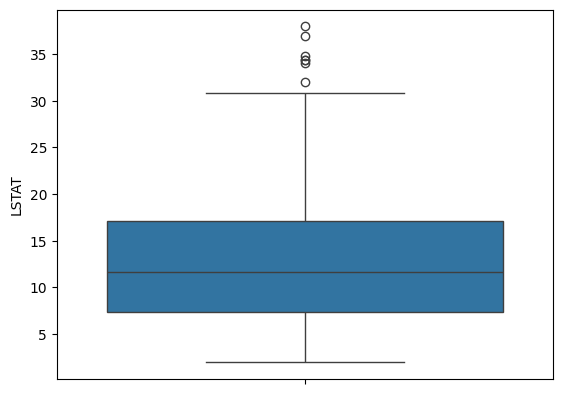

In [16]:
# Outliers
sns.boxplot(y='LSTAT', data=dados);

## PTRATIO

In [17]:
# número de bairros com menor quantidade de alunos por professor, e maior quantidade de alunos por professor
dados['PTRATIO'].value_counts().sort_index()

,count
PTRATIO,
12.6,3
13.0,10
14.7,29
14.8,3
14.9,4
15.1,1
15.2,13
15.3,3
15.5,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


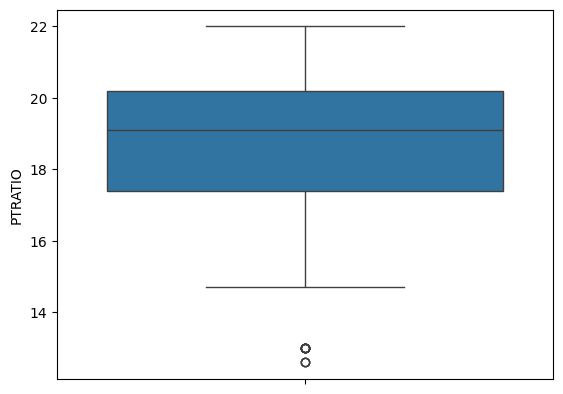

In [18]:
# Outliers
sns.boxplot(y='PTRATIO', data=dados);

## MEDV

In [19]:
# Menores e maiores valores dos imóveis
dados['MEDV'].value_counts().sort_index()

,count
MEDV,
105000.0,2
117600.0,1
132300.0,1
147000.0,2
151200.0,3
...,...
966000.0,1
980700.0,1
1014300.0,1


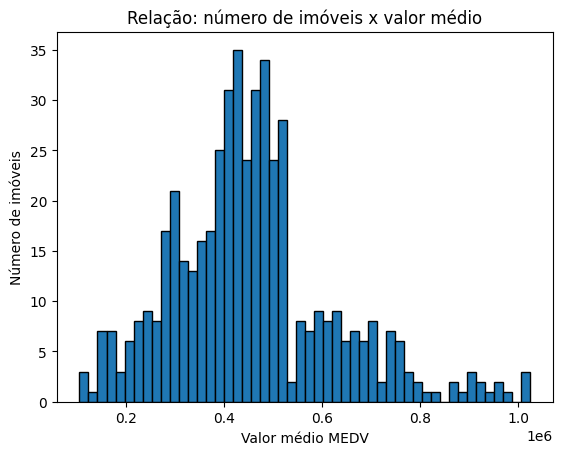

In [20]:
plt.hist(dados['MEDV'], bins=50, edgecolor='black')
plt.title('Relação: número de imóveis x valor médio')
plt.xlabel('Valor médio MEDV')
plt.ylabel('Número de imóveis')
plt.show()

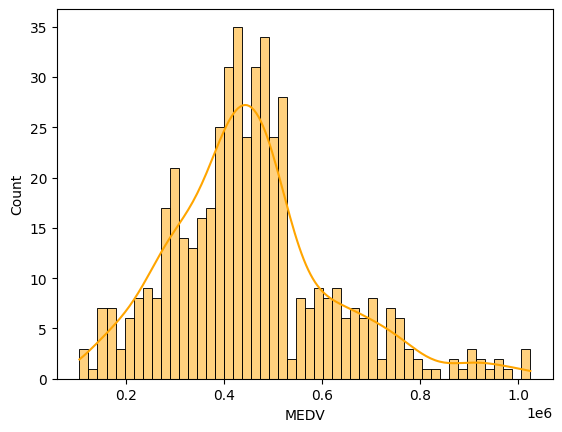

In [21]:
sns.histplot(dados, x='MEDV', bins=50, color="orange", kde=True, stat="count");

# Data Cleanning

Etapa não nescessária, pois os dados já se encontram limpos e tratados

# Análise Estatística e Descritiva

In [36]:
round(dados.describe(),)

,RM,LSTAT,PTRATIO,MEDV
count,489.0,489.0,489.0,489.0
mean,6.0,13.0,19.0,454343.0
std,1.0,7.0,2.0,165340.0
min,4.0,2.0,13.0,105000.0
25%,6.0,7.0,17.0,350700.0
50%,6.0,12.0,19.0,438900.0
75%,7.0,17.0,20.0,518700.0
max,8.0,38.0,22.0,1024800.0


## Correlação linear


- RM: Número médio de cômodos entre os imóveis no bairro.

- LSTAT: Porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

- PTRATIO: Razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

- MEDV: Valor médio das casas

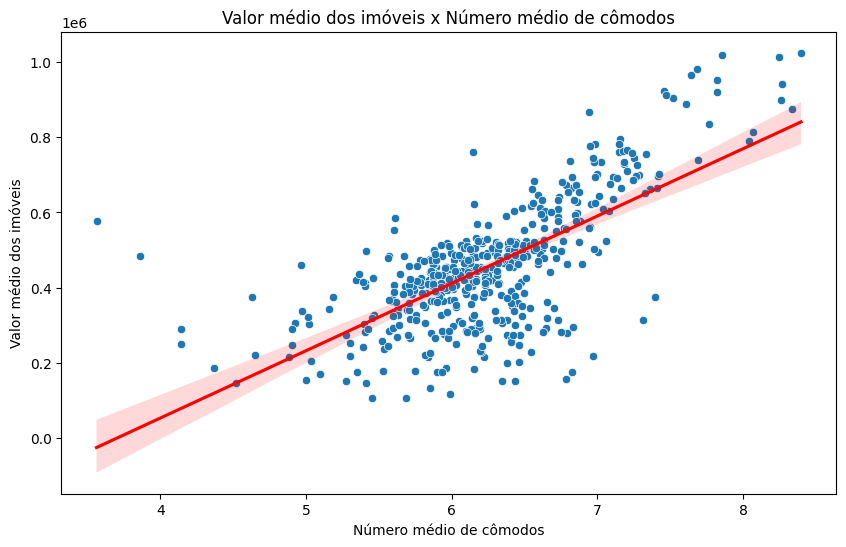

In [37]:
# Correlação linear entre RM e MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RM', y='MEDV', data=dados)
sns.regplot(x='RM', y='MEDV', data=dados, scatter=False, color='red')
plt.title('Valor médio dos imóveis x Número médio de cômodos')
plt.xlabel('Número médio de cômodos')
plt.ylabel('Valor médio dos imóveis')
plt.show()

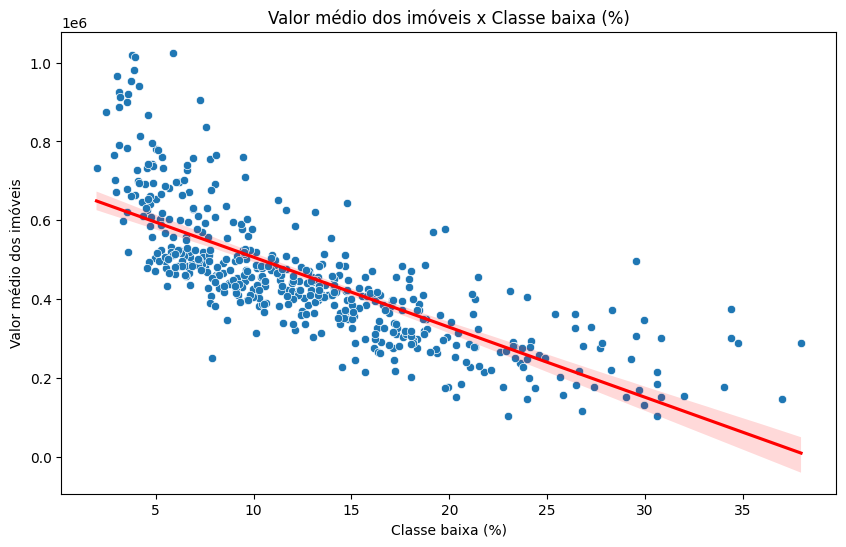

In [38]:
# Correlação linear entre LSTAT e MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=dados)
sns.regplot(x='LSTAT', y='MEDV', data=dados, scatter=False, color='red')
plt.title('Valor médio dos imóveis x Classe baixa (%)')
plt.xlabel('Classe baixa (%)')
plt.ylabel('Valor médio dos imóveis')
plt.show()

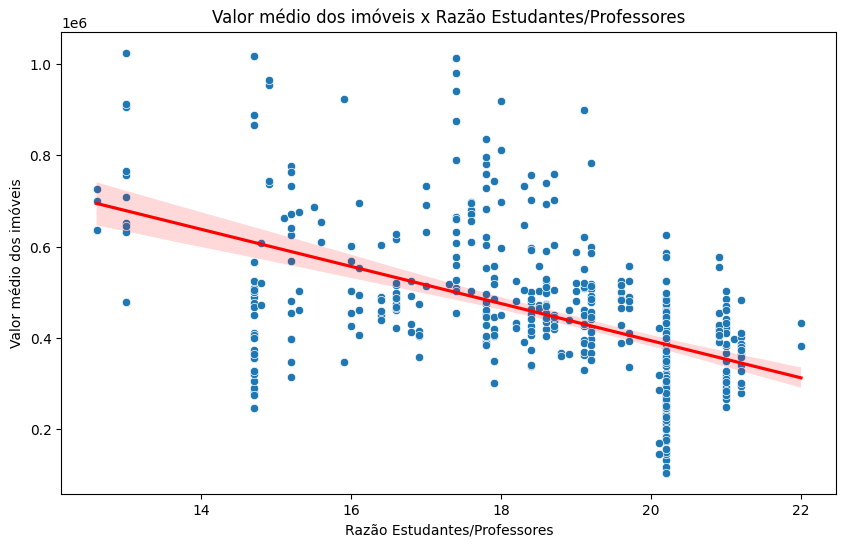

In [39]:
# Correlação linear entre PTRATIO e MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTRATIO', y='MEDV', data=dados)
sns.regplot(x='PTRATIO', y='MEDV', data=dados, scatter=False, color='red')
plt.title('Valor médio dos imóveis x Razão Estudantes/Professores')
plt.xlabel('Razão Estudantes/Professores')
plt.ylabel('Valor médio dos imóveis')
plt.show()

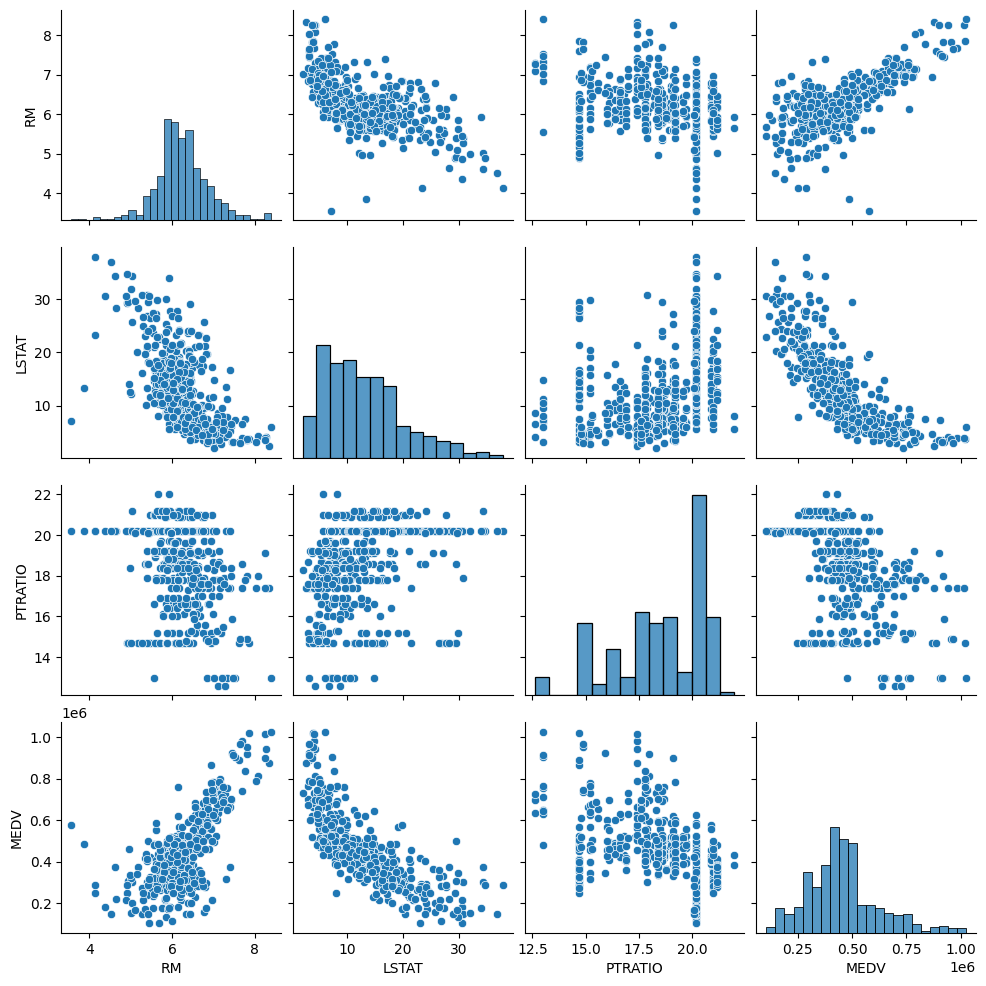

In [40]:
sns.pairplot(dados);

## Análise de normalidade

In [41]:
# Importação da biblioteca
import scipy.stats as stats

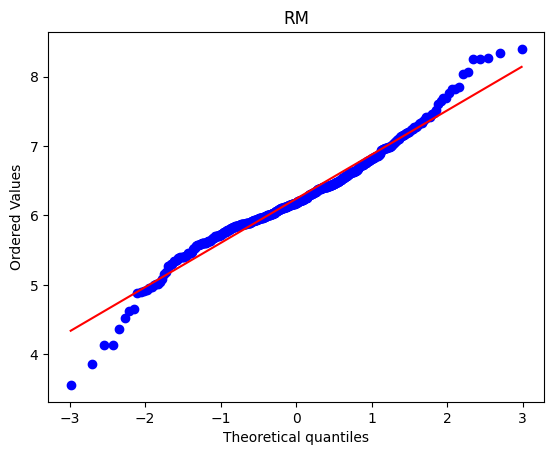

In [42]:
# Análise de normalidade
# O gráfico mostra que os dados seguem uma distribuição normal apenas no centro, e não em ambos os lados.
stats.probplot(dados['RM'], dist="norm", plot=plt)
plt.title("RM")
plt.show()

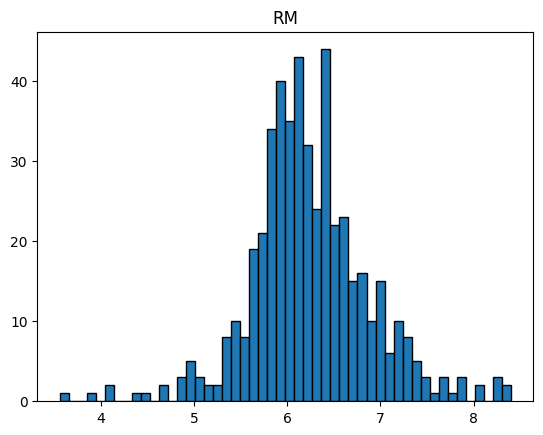

In [43]:
# O histograma comprova o gráfico anterior
plt.hist(dados['RM'], bins=50, edgecolor='black')
plt.title("RM")
plt.show()

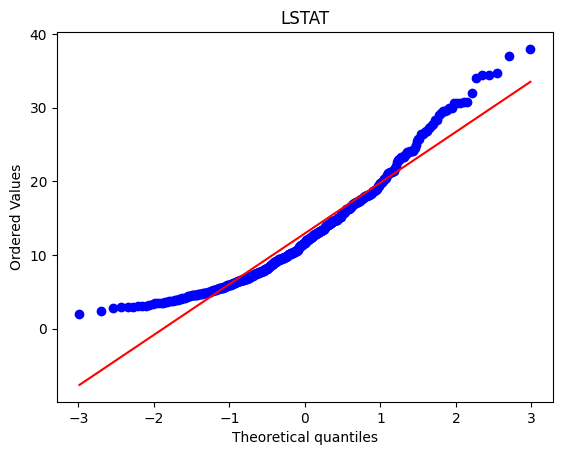

In [44]:
# Análise de normalidade
# O gráfico mostra que os dados não seguem uma distribuição normal
stats.probplot(dados['LSTAT'], dist="norm", plot=plt)
plt.title("LSTAT")
plt.show()

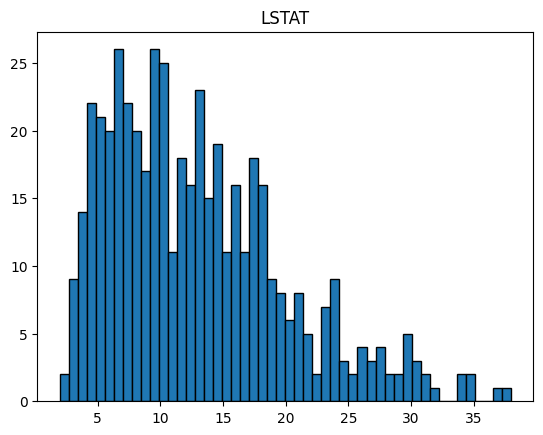

In [45]:
# O histograma comprova o gráfico anterior
plt.hist(dados['LSTAT'], bins=50, edgecolor='black')
plt.title("LSTAT")
plt.show()

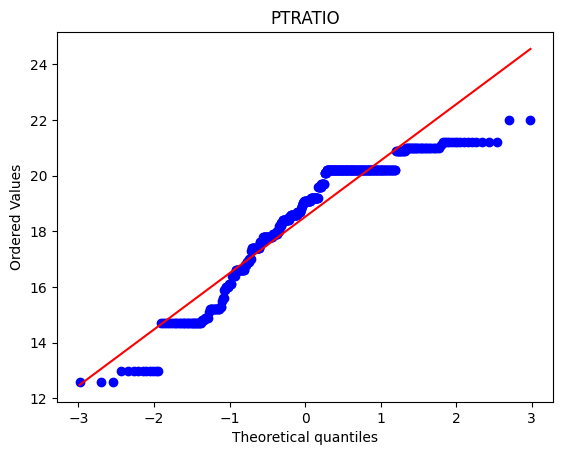

In [46]:
# O gráfico mostra que os dados não seguem uma distribuição normal.
stats.probplot(dados['PTRATIO'], dist="norm", plot=plt)
plt.title("PTRATIO")
plt.show()

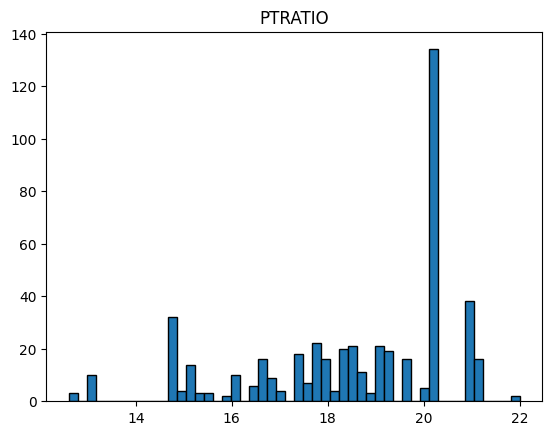

In [47]:
# O histograma comprova o gráfico anterior
plt.hist(dados['PTRATIO'], bins=50, edgecolor='black')
plt.title("PTRATIO")
plt.show()

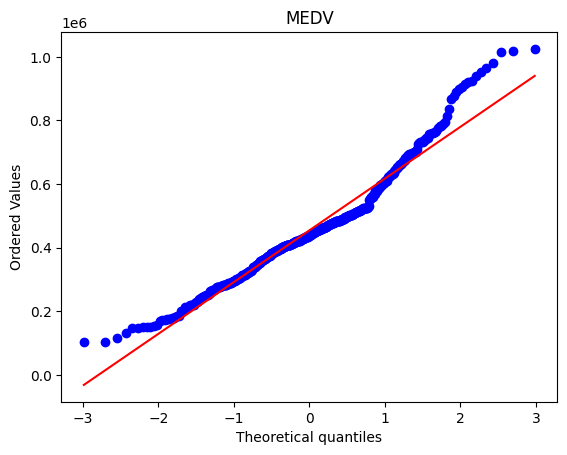

In [48]:
# O gráfico mostra que os dados seguem uma distribuição normal apenas no centro, e não em ambos os lados.
stats.probplot(dados['MEDV'], dist="norm", plot=plt)
plt.title("MEDV")
plt.show()

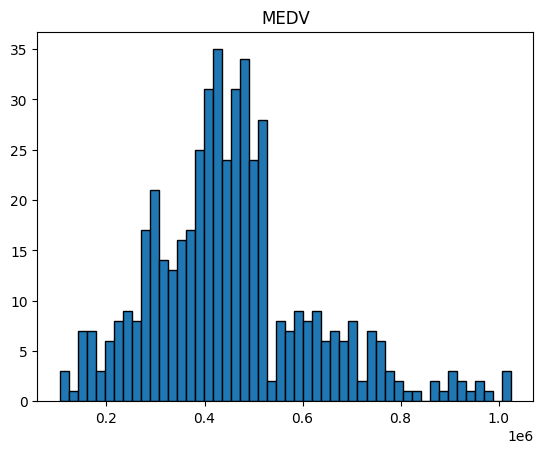

In [49]:
# O histograma comprova o gráfico anterior
plt.hist(dados['MEDV'], bins=50, edgecolor='black')
plt.title("MEDV")
plt.show()

# Salvando (exportando) o Dataframe Tratado

In [52]:
dados.to_csv('housing_tratado.csv', sep=';', encoding='utf-8', index = False)